# Computations and Figures for a Department of Statistics Colloquim at Purdue University
talk presented on Friday, March 3, 2023

### Import the necessary packages and set up plotting routines

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qmcpy as qp
import time  #timing routines
import warnings  #to suppress warnings when needed
import pickle  #write output to a file and load it back in
from copy import deepcopy

plt.rc('font', size=16)  #set defaults so that the plots are readable
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.rc('figure', titlesize=16)

#a helpful plotting method to show increasing numbers of points
def plot_successive_points(distrib,ld_name,first_n=64,n_cols=1,
                           pt_clr=['tab:blue', 'tab:green', 'k', 'tab:cyan', 'tab:purple', 'tab:orange'],
                           xlim=[0,1],ylim=[0,1]):
  fig,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(5*n_cols,5.5))
  if n_cols==1: ax = [ax]
  last_n = first_n*(2**n_cols)
  points = distrib.gen_samples(n=last_n)
  for i in range(n_cols):
    n = first_n
    nstart = 0
    for j in range(i+1):
      n = first_n*(2**j)
      ax[i].scatter(points[nstart:n,0],points[nstart:n,1],color=pt_clr[j])
      nstart = n
    ax[i].set_title('n = %d'%n)
    ax[i].set_xlim(xlim); ax[i].set_xticks(xlim); ax[i].set_xlabel('$x_{i,1}$')
    ax[i].set_ylim(ylim); ax[i].set_yticks(ylim); ax[i].set_ylabel('$x_{i,2}$')
    ax[i].set_aspect((xlim[1]-xlim[0])/(ylim[1]-ylim[0]))
  fig.suptitle('%s Points'%ld_name, y=0.87)
  return fig

print('QMCPy Version',qp.__version__)

#plt.style.use('../qmcpy.mplstyle')
figpath = '/Users/fredhickernell/SoftwareRepositories/Purdue-2023-March-Talk/figures/' #this path sends the figures to my directory

QMCPy Version 1.3.2


## Here are some plots of IID and Low Discrepancy (LD) Points
### Lattice points first

[[0.85033212 0.40954284 0.36182949 0.92617807 0.52508243]
 [0.35033212 0.90954284 0.86182949 0.42617807 0.02508243]
 [0.10033212 0.15954284 0.11182949 0.17617807 0.77508243]
 [0.60033212 0.65954284 0.61182949 0.67617807 0.27508243]
 [0.97533212 0.78454284 0.73682949 0.05117807 0.65008243]
 [0.47533212 0.28454284 0.23682949 0.55117807 0.15008243]
 [0.22533212 0.53454284 0.48682949 0.30117807 0.90008243]
 [0.72533212 0.03454284 0.98682949 0.80117807 0.40008243]
 [0.91283212 0.09704284 0.54932949 0.98867807 0.08758243]
 [0.41283212 0.59704284 0.04932949 0.48867807 0.58758243]
 [0.16283212 0.84704284 0.29932949 0.23867807 0.33758243]
 [0.66283212 0.34704284 0.79932949 0.73867807 0.83758243]
 [0.03783212 0.47204284 0.92432949 0.11367807 0.21258243]
 [0.53783212 0.97204284 0.42432949 0.61367807 0.71258243]
 [0.28783212 0.22204284 0.67432949 0.36367807 0.46258243]
 [0.78783212 0.72204284 0.17432949 0.86367807 0.96258243]
 [0.88158212 0.75329284 0.45557949 0.95742807 0.30633243]
 [0.38158212 0

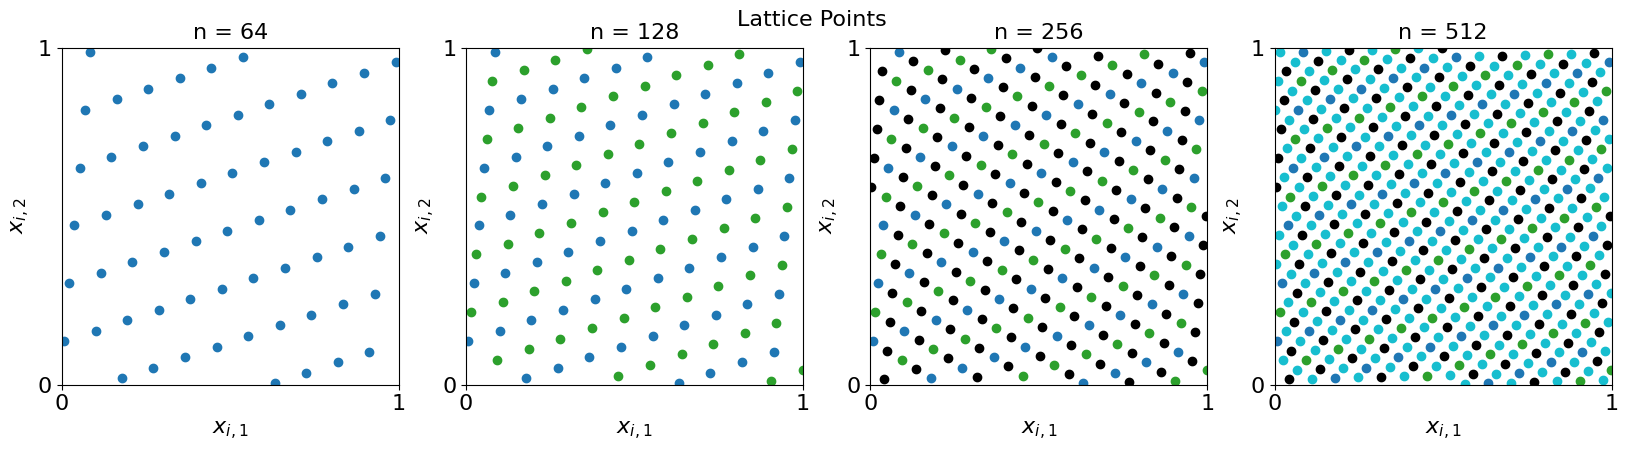

In [2]:
d = 5 #dimension
n = 64 #number of points
ld = qp.Lattice(d) #define the generator
xpts = ld.gen_samples(n) #generate points
print(xpts)
fig = plot_successive_points(ld,'Lattice',first_n=n,n_cols=4)
fig.savefig(figpath+'latticepts.eps',format='eps',bbox_inches='tight')

### Next Sobol' points

[[6.10300971e-01 5.25635511e-01 1.25415322e-01 2.36998469e-01
  1.18159195e-02]
 [4.43883335e-01 2.27362653e-01 8.28008133e-01 7.11183601e-01
  7.26576278e-01]
 [8.29728781e-01 4.74155957e-01 7.28227680e-01 8.35588813e-01
  3.19998998e-01]
 [2.26438720e-01 7.72555604e-01 2.87326913e-01 3.72358822e-01
  9.09878569e-01]
 [6.96921377e-01 3.27533344e-03 3.86206267e-01 6.92391116e-02
  2.02123937e-01]
 [3.74870886e-01 7.36127506e-01 5.67337590e-01 6.05505582e-01
  5.41883344e-01]
 [9.77489814e-01 9.96656571e-01 9.71321050e-01 9.72586574e-01
  3.80177416e-01]
 [9.23192541e-02 2.63681309e-01 4.41150465e-02 4.46298685e-01
  8.45061750e-01]
 [5.25127034e-01 3.56022045e-01 7.77915039e-01 3.08077927e-01
  5.72662962e-01]
 [4.21634675e-01 9.04300595e-01 2.06147200e-01 7.67181369e-01
  1.70359801e-01]
 [8.05588508e-01 6.43890788e-01 3.64553825e-01 6.54738988e-01
  7.51817724e-01]
 [1.39251100e-01 9.54967742e-02 6.82373464e-01 1.76379624e-01
  4.74389628e-01]
 [6.57156404e-01 8.64790486e-01 5.229519

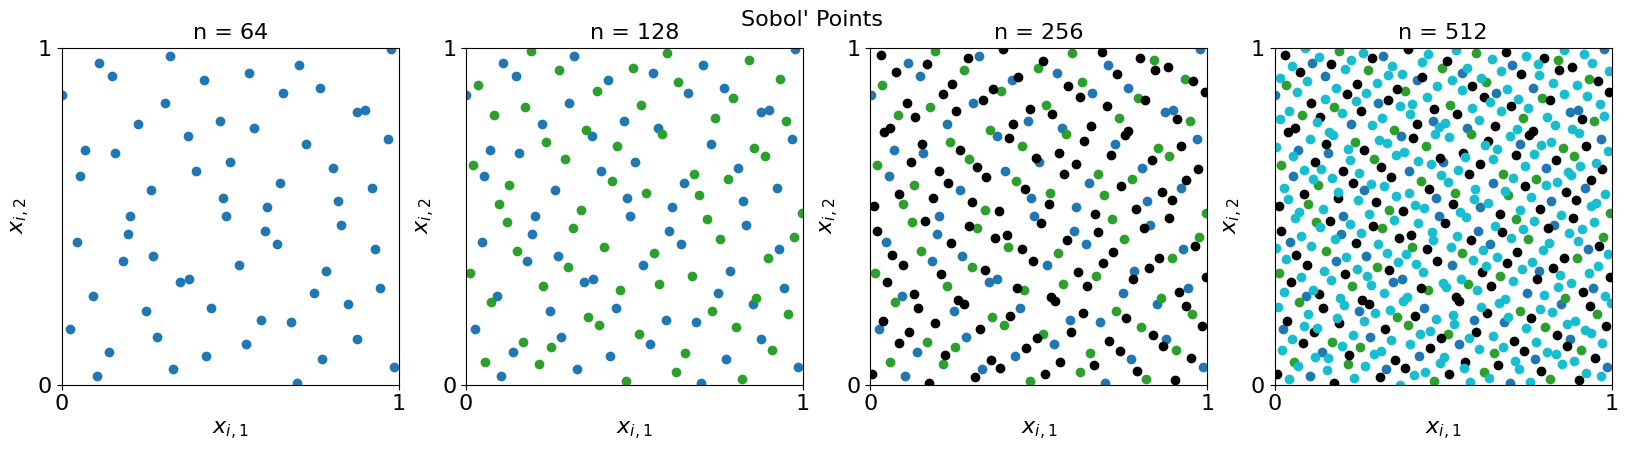

In [3]:
ld = qp.Sobol(d) #define the generator
xpts = ld.gen_samples(n) #generate points
print(xpts)
fig = plot_successive_points(ld,'Sobol\'',first_n=n,n_cols=4)
fig.savefig(figpath+'sobolpts.eps',format='eps',bbox_inches='tight')

### Compare to IID

Note that there are more gaps and clusters

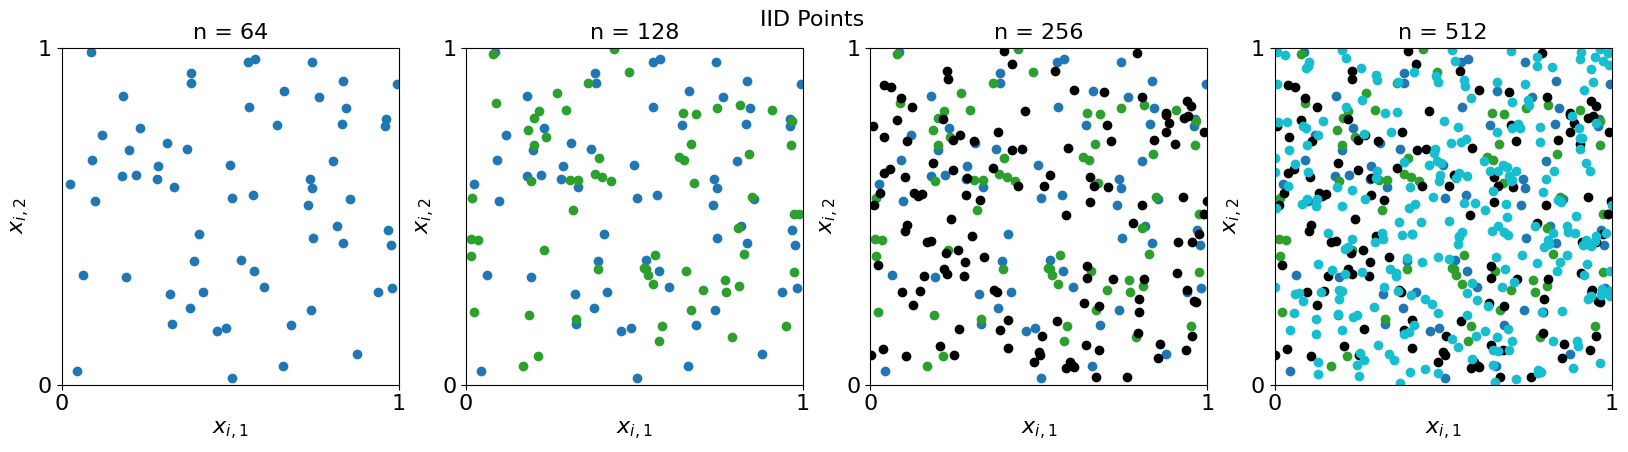

In [4]:
iid = qp.IIDStdUniform(d) #define the generator
fig = plot_successive_points(iid,'IID',first_n=n,n_cols=4)
fig.savefig(figpath+'iidpts.eps',format='eps',bbox_inches='tight')

## Beam Example Plots

### Plot IID and LD results for the beam example

[1037.12106673]


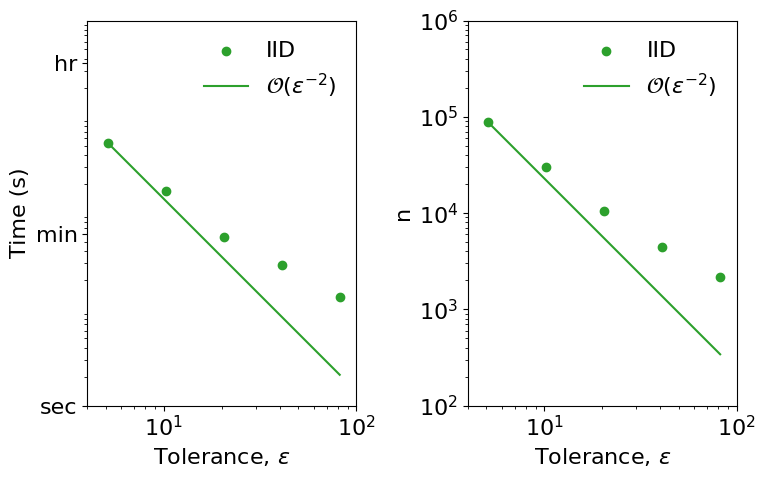

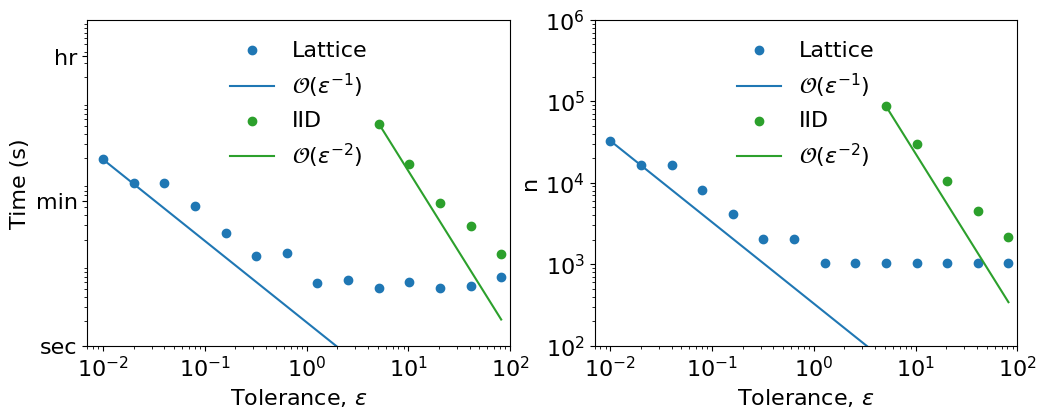

In [5]:
with open(figpath+'iid_ld.pkl','rb') as myfile: tol_vec,n_tol,ii_iid,ld_time,ld_n,iid_time,iid_n,best_solution_i = pickle.load(myfile)
print(best_solution_i)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(9,5))
ax[0].scatter(tol_vec[ii_iid:n_tol],iid_time[ii_iid:n_tol],color='tab:green'); 
ax[0].plot(tol_vec[ii_iid:n_tol],[(iid_time[ii_iid]*(tol_vec[ii_iid]**2))/(tol_vec[jj]**2) for jj in range(ii_iid,n_tol)],color='tab:green')
ax[0].set_ylim([1,1e4]); ax[0].set_ylabel('Time (s)')
ax[1].scatter(tol_vec[ii_iid:n_tol],iid_n[ii_iid:n_tol],color='tab:green'); 
ax[1].plot(tol_vec[ii_iid:n_tol],[(iid_n[ii_iid]*(tol_vec[ii_iid]**2))/(tol_vec[jj]**2) for jj in range(ii_iid,n_tol)],color='tab:green')
ax[1].set_ylim([1e2,1e6]); ax[1].set_ylabel('n')
for ii in range(2):
  ax[ii].set_xlim([4,100]); 
  ax[ii].set_xticks([10,100])
  ax[ii].set_xlabel('Tolerance, '+r'$\varepsilon$')
  ax[ii].set_xscale('log'); ax[ii].set_yscale('log')
  ax[ii].legend(['IID',r'$\mathcal{O}(\varepsilon^{-2})$'],frameon=False)
  ax[ii].set_aspect(0.5)
ax[0].set_yticks([1, 60, 3600], labels = ['sec', 'min', 'hr'])
fig.savefig(figpath+'iidbeam.eps',format='eps',bbox_inches='tight')

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
ax[0].scatter(tol_vec[0:n_tol],ld_time[0:n_tol],color='tab:blue'); 
ax[0].plot(tol_vec[0:n_tol],[(ld_time[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='tab:blue')
ax[0].scatter(tol_vec[ii_iid:n_tol],iid_time[ii_iid:n_tol],color='tab:green'); 
ax[0].plot(tol_vec[ii_iid:n_tol],[(iid_time[ii_iid]*(tol_vec[ii_iid]**2))/(tol_vec[jj]**2) for jj in range(ii_iid,n_tol)],color='tab:green')
ax[0].set_ylim([1,1e4]); ax[0].set_ylabel('Time (s)')
ax[1].scatter(tol_vec[0:n_tol],ld_n[0:n_tol],color='tab:blue'); 
ax[1].plot(tol_vec[0:n_tol],[(ld_n[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='tab:blue')
ax[1].scatter(tol_vec[ii_iid:n_tol],iid_n[ii_iid:n_tol],color='tab:green'); 
ax[1].plot(tol_vec[ii_iid:n_tol],[(iid_n[ii_iid]*(tol_vec[ii_iid]**2))/(tol_vec[jj]**2) for jj in range(ii_iid,n_tol)],color='tab:green')
ax[1].set_ylim([1e2,1e6]); ax[1].set_ylabel('n')
for ii in range(2):
  ax[ii].set_xlim([0.007,100]); ax[ii].set_xlabel('Tolerance, '+r'$\varepsilon$')
  ax[ii].set_xticks([0.01,0.1,1,10,100])
  ax[ii].set_xscale('log'); ax[ii].set_yscale('log')
  ax[ii].legend(['Lattice',r'$\mathcal{O}(\varepsilon^{-1})$','IID',r'$\mathcal{O}(\varepsilon^{-2})$'],frameon=False)
  ax[ii].set_aspect(0.8)
ax[0].set_yticks([1, 60, 3600], labels = ['sec', 'min', 'hr'])
fig.savefig(figpath+'iidldbeam.eps',format='eps',bbox_inches='tight')

### Plot the time and sample sizerequired to solve for the deflection of the whole beam using low discrepancy with and without parallel

[   0.            4.09650336   15.63089718   33.92196588   58.36259037
   88.42166624  123.63753779  163.62564457  208.07398743  256.74371736
  309.46852588  362.17337763  410.80019812  455.47543786  496.40155276
  533.85794874  568.20201672  599.87051305  629.38039738  657.32920342
  684.39496877  712.15829288  742.93687638  776.09146089  811.06031655
  847.35856113  884.57752606  922.38415394  960.52038491  998.8025606
 1037.12106673]


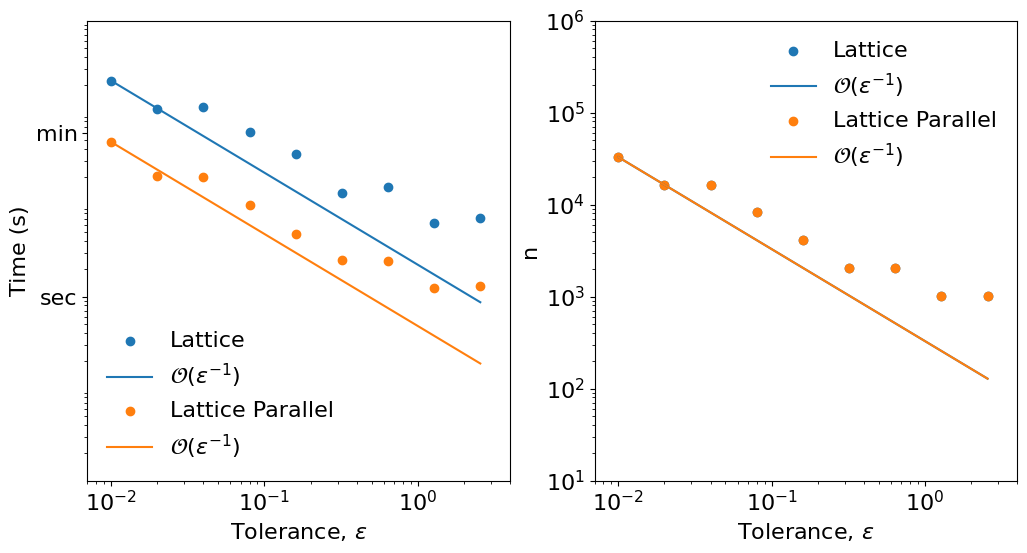

In [6]:
with open(figpath+'ld_parallel.pkl','rb') as myfile: tol_vec,n_tol,ld_time,ld_n,ld_p_time,ld_p_n,best_solution = pickle.load(myfile)
print(best_solution)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
ax[0].scatter(tol_vec[0:n_tol],ld_time[0:n_tol],color='tab:blue'); 
ax[0].plot(tol_vec[0:n_tol],[(ld_time[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='tab:blue')
ax[0].scatter(tol_vec[0:n_tol],ld_p_time[0:n_tol],color='tab:orange'); 
ax[0].plot(tol_vec[0:n_tol],[(ld_p_time[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='tab:orange')
ax[0].set_ylim([0.01,1000]); ax[0].set_ylabel('Time (s)')
ax[1].scatter(tol_vec[0:n_tol],ld_n[0:n_tol],color='tab:blue'); 
ax[1].plot(tol_vec[0:n_tol],[(ld_n[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='tab:blue')
ax[1].scatter(tol_vec[0:n_tol],ld_p_n[0:n_tol],color='tab:orange'); 
ax[1].plot(tol_vec[0:n_tol],[(ld_p_n[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='tab:orange')
ax[1].set_ylim([10,1e6]); ax[1].set_ylabel('n')
for ii in range(2):
  ax[ii].set_xlim([0.007,4]); ax[ii].set_xlabel('Tolerance, '+r'$\varepsilon$')
  ax[ii].set_xscale('log'); ax[ii].set_yscale('log')
  ax[ii].legend(['Lattice',r'$\mathcal{O}(\varepsilon^{-1})$','Lattice Parallel',r'$\mathcal{O}(\varepsilon^{-1})$'],frameon=False)
  ax[ii].set_aspect(0.6)
ax[0].set_yticks([1, 60], labels = ['sec', 'min'])
fig.savefig(figpath+'ldparallelbeam.eps',format='eps',bbox_inches='tight')

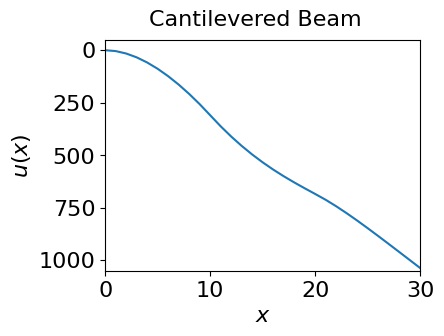

In [90]:
fig,ax = plt.subplots(figsize=(6,3))
ax.plot(best_solution,'-')
ax.set_xlim([0,len(best_solution)-1]); ax.set_xlabel(r'$x$')
ax.set_ylim([1050,-50]);  ax.set_ylabel(r'$u(x)$');
ax.set_aspect(0.02)
fig.suptitle('Cantilevered Beam')
fig.savefig(figpath+'cantileveredbeam.eps',format='eps',bbox_inches='tight')

### Alternative labels on plot

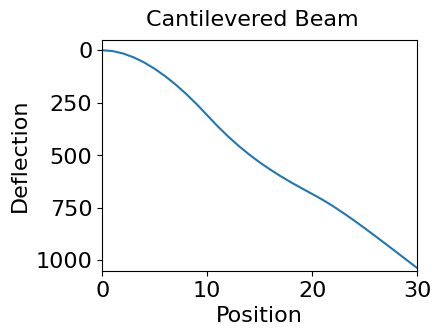

In [7]:
fig,ax = plt.subplots(figsize=(6,3))
ax.plot(best_solution,'-')
ax.set_xlim([0,len(best_solution)-1]); ax.set_xlabel('Position')
ax.set_ylim([1050,-50]);  ax.set_ylabel('Deflection');
ax.set_aspect(0.02)
fig.suptitle('Cantilevered Beam')
fig.savefig(figpath+'cantileveredbeamwords.eps',format='eps',bbox_inches='tight')

In [ ]:
assert False #stop here to finish figures

## Below is long-running code, that we rarely wish to run

## Beam Example Computations
### Set up the problem using a docker container to solve the ODE

In [ ]:
import umbridge #this is the connector
!docker run --name muqbp -d -it -p 4243:4243 linusseelinger/benchmark-muq-beam-propagation:latest #get beam example
d = 3 #dimension of the randomness
lb = 1 #lower bound on randomness
ub = 1.2 #upper bound on randomness
umbridge_config = {"d": d}
model = umbridge.HTTPModel('http://localhost:4243','forward') #this is the original model
outindex = -1 #choose last element of the vector of beam deflections
modeli = deepcopy(model) #and construct a model for just that deflection
modeli.get_output_sizes = lambda *args : [1]
modeli.get_output_sizes()
modeli.__call__ = lambda *args,**kwargs: [[model.__call__(*args,**kwargs)[0][outindex]]]

### First we compute the time required to solve for the deflection of the end point using IID and low discrepancy 

In [ ]:
ld = qp.Uniform(qp.Lattice(d,seed=7),lower_bound=lb,upper_bound=ub) #lattice points for this problem
ld_integ = qp.UMBridgeWrapper(ld,modeli,umbridge_config,parallel=False) #integrand
iid = qp.Uniform(qp.IIDStdUniform(d),lower_bound=lb,upper_bound=ub) #iid points for this problem
iid_integ = qp.UMBridgeWrapper(iid,modeli,umbridge_config,parallel=False) #integrand
tol = 0.01  #smallest tolerance

n_tol = 14  #number of different tolerances
ii_iid = 9  #make this larger to reduce the time required by not running all cases for IID
tol_vec = [tol*(2**ii) for ii in range(n_tol)]  #initialize vector of tolerances
ld_time = [0]*n_tol; ld_n = [0]*n_tol  #low discrepancy time and number of function values
iid_time = [0]*n_tol; iid_n = [0]*n_tol  #IID time and number of function values
print(f'\nCantilever Beam\n')
print('iteration ', end = '')
for ii in range(n_tol):
  solution, data = qp.CubQMCLatticeG(ld_integ, abs_tol = tol_vec[ii]).integrate()
  if ii == 0:
    best_solution_i = solution
  ld_time[ii] = data.time_integrate
  ld_n[ii] = data.n_total
  if ii >= ii_iid:
    solution, data = qp.CubMCG(iid_integ, abs_tol = tol_vec[ii]).integrate()
    iid_time[ii] = data.time_integrate
    iid_n[ii] = data.n_total
  print(ii, end = ' ')
with open(figpath+'iid_ld.pkl','wb') as myfile:pickle.dump([tol_vec,n_tol,ii_iid,ld_time,ld_n,iid_time,iid_n,best_solution_i],myfile)

### Next, we compute the time required to solve for the deflection of the whole beam using low discrepancy with and without parallel

In [ ]:
ld_integ = qp.UMBridgeWrapper(ld,model,umbridge_config,parallel=False) #integrand
ld_integ_p = qp.UMBridgeWrapper(ld,model,umbridge_config,parallel=8) #integrand with parallel processing

tol = 0.01
n_tol = 9  #number of different tolerances
tol_vec = [tol*(2**ii) for ii in range(n_tol)]  #initialize vector of tolerances
ld_time = [0]*n_tol; ld_n = [0]*n_tol  #low discrepancy time and number of function values
ld_p_time = [0]*n_tol; ld_p_n = [0]*n_tol  #low discrepancy time and number of function values with parallel
print(f'\nCantilever Beam\n')
print('iteration ', end = '')
for ii in range(n_tol):
  solution, data = qp.CubQMCLatticeG(ld_integ, abs_tol = tol_vec[ii]).integrate()
  if ii == 0:
    best_solution = solution
  ld_time[ii] = data.time_integrate
  ld_n[ii] = data.n_total
  solution, data = qp.CubQMCLatticeG(ld_integ_p, abs_tol = tol_vec[ii]).integrate()
  ld_p_time[ii] = data.time_integrate
  ld_p_n[ii] = data.n_total
  print(ii, end = ' ') 
with open(figpath+'ld_parallel.pkl','wb') as myfile:pickle.dump([tol_vec,n_tol,ld_time,ld_n,ld_p_time,ld_p_n,best_solution],myfile)

In [ ]:
!docker rm -f muqbp #shut down docker image